In [1]:
import math
import numpy as np

import matplotlib.pyplot as plot
from matplotlib import ticker, text as text_plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from figure import LineStyle, Marker, Hatch, Location, Align, FontWeight
from text import colored_text
from save import savefig

"""
参考教程：
  - 11 种 Matplotlib 科研论文图表教程：https://www.python88.com/topic/138544
  - 官方教程：https://matplotlib.org/stable/gallery
  - 图形设置：https://blog.csdn.net/qq_40481843/article/details/106231257
"""
dpi_save = 500

In [2]:
class LegendTitle(object):
    """
    图例中的标题
    """
    def __init__(self, text_props=None):
        super().__init__()
        self.text_props = text_props or {}
        
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = text_plot.Text(x0, y0, orig_handle, **self.text_props)
        handlebox.add_artist(title)
        return title

Saving figure to ./figures/Performance Comparison figure.svg


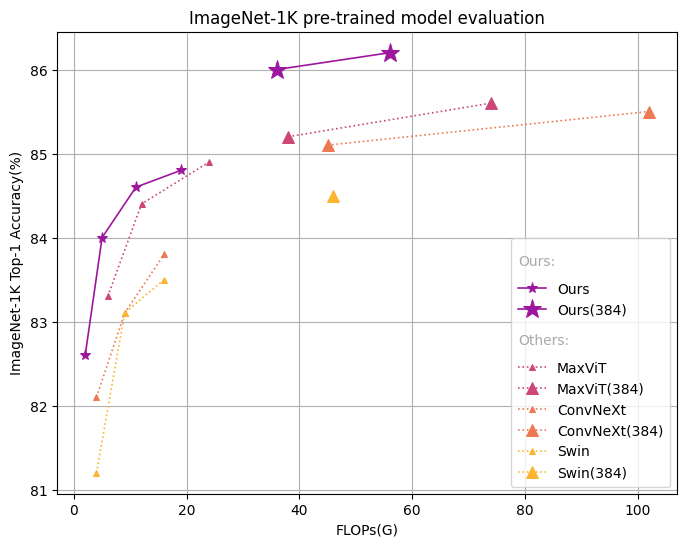

In [3]:

# Performance Comparison figure
# 参考论文：
#   - 《TransNeXt: Robust Foveal Visual Perception for Vision Transformers》
# plot 风格参考：https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plot.style.use('default')                                # 修改 plot 风格
fig: plot.Figure = plot.figure(figsize=(8, 6), dpi=100)  # 创建图形，包括所有维度、图像、文本和标签对象的容器
ax: plot.Axes = plot.axes()                            # 创建维度，包括图像、有边界的格子、刻度和标签、图表元素


# == 数据点 ==
data_points = {
    'Ours':
        {
            'points': np.array([[2, 82.6], [5, 84], [11, 84.6], [19, 84.8]]),
            'marker_style': "ours",
            'color_index': 0,
            'group': "Ours",
        },
    'Ours(384)': 
        {
            'points': np.array([[36, 86], [56, 86.2]]),
            'marker_style': "ours_l",
            'color_index': 0,
            'group': "Ours",
        },
    'MaxViT':
        {
            'points': np.array([[6, 83.3], [12, 84.4], [24, 84.9]]),
            'marker_style': "others",
            'color_index': 1,
            'group': "Others",
        },
    'MaxViT(384)':
        {
            'points': np.array([[38, 85.2], [74, 85.6]]),
            'marker_style': "others_l",
            'color_index': 1,
            'group': "Others",
        },
    'ConvNeXt':
        {
            'points': np.array([[4, 82.1], [9, 83.1], [16, 83.8]]),
            'marker_style': "others",
            'color_index': 2,
            'group': "Others",
        },
    'ConvNeXt(384)':
        {
            'points': np.array([[45, 85.1], [102, 85.5]]),
            'marker_style': "others_l",
            'color_index': 2,
            'group': "Others",
        },
    'Swin':
        {
            'points': np.array([[4, 81.2], [9, 83.1], [16, 83.5]]),
            'marker_style': "others",
            'color_index': 3,
            'group': "Others",
        },
    'Swin(384)':
        {
            'points': np.array([[46, 84.5]]),
            'marker_style': "others_l",
            'color_index': 3,
            'group': "Others",
        },
}
num_datas = len(data_points) // 2


# == 自定义颜色映射 ==
# 参考：https://blog.csdn.net/mr_cat123/article/details/78638491
color_shrink = 2
color_offset = 0
cmap = plot.cm.get_cmap("plasma", num_datas + (color_shrink * 2 - 1))    # 自定义颜色映射
for key, value in data_points.items():
    if 'color_index' in value:
        value['color'] = cmap(value['color_index'] + color_shrink + color_offset)


# == 标记和线条参数 ==
marker_dict = {
    'ours': 
        {
            'linestyle': LineStyle.SOLID.value,  # 线条类型
            'marker': Marker.STAR.value,         # 标记图形
            'markersize': 8, 
            'markeredgewidth': 0.7
        },  # 还有 'markeredgecolor', 'markerfacecolor' 等参数
    'ours_l': 
        {
            'linestyle': LineStyle.SOLID.value,
            'marker': Marker.STAR.value,
            'markersize': 14, 
            'markeredgewidth': 0.7
        },
    'others': 
        {
            'linestyle': LineStyle.DOTTED.value,
            'marker': Marker.TRIANGLE_UP.value, 
            'markersize': 5, 
            'markeredgewidth': 0.7
        },
    'others_l': 
        {
            'linestyle': LineStyle.DOTTED.value,
            'marker': Marker.TRIANGLE_UP.value,
            'markersize': 9, 
            'markeredgewidth': 0.7
        },
}
line_kwargs = {'linewidth': 1.2}


# == 绘制折线图 ==
# 参考：https://blog.csdn.net/qq_43874317/article/details/130778939
for label, value in data_points.items():
    points = value['points']
    marker_style = value['marker_style'] if 'marker_style' in value else 'others'
    color = value['color'] if 'color' in value else 'gray'
    marker_kwargs = marker_dict[marker_style]
    plot.plot(points[:, 0], points[:, 1],               # 数据点
              label=label,                              # 图例标签
              color=color,                              # 线条颜色
              **marker_kwargs, **line_kwargs)           # 标记和线条参数
    

# == 显示图例 ==
# 参考：https://blog.csdn.net/mighty13/article/details/113820798
# 整理图例分组
legend_icons, legend_labels = ax.get_legend_handles_labels()
legend_groups = {}
for icon, label, value in zip(legend_icons, legend_labels, data_points.values()):
    value_dict = dict(icon=icon, label=label)
    # 如果存在未分组的图例，则添加 'Ungrouped' 组
    if 'group' not in value:
        if 'Ungrouped' not in legend_groups:
            legend_groups['Ungrouped'] = []
        legend_groups['Ungrouped'].append(value_dict)
        continue
    # 如果存在分组的图例，则添加分组名
    group = value['group']
    if not group in legend_groups:
        legend_groups[group] = []
    legend_groups[group].append(value_dict)
# 将未分组的图例放在最后
if 'Ungrouped' in legend_groups:
    ungrouped_group = legend_groups['Ungrouped']
    legend_groups.pop('Ungrouped')
    legend_groups['Ungrouped'] = ungrouped_group
# 收集分组图例
legend_icons = []
legend_labels = []
for key, value in legend_groups.items():
    legend_icons.append(f"{key}:")
    legend_labels.append("\n")
    for item in value:
        legend_icons.append(item['icon'])
        legend_labels.append(item['label'])
# 绘制图例
plot.legend(legend_icons, 
            legend_labels,
            handler_map={str: LegendTitle({'color': "darkgray"})},  # 标题格式
            loc=Location.LOWER_RIGHT.value,                         # 图例位置
            frameon=True,                                           # 边框显示，默认为 False
            fancybox=True,                                          # 边框圆角，默认为 True
            borderpad=0.5,                                          # 边框距离，默认为 0.4
            )


# == 设置图表信息 ==
plot.title("ImageNet-1K pre-trained model evaluation")
plot.xlabel("FLOPs(G)")
plot.ylabel("ImageNet-1K Top-1 Accuracy(%)")


# == 设置网格 ==
plot.grid()


# == 保存和展示图标 ==
savefig(fig=fig, path="./figures/Performance Comparison figure", dpi=dpi_save) # 保存图表
plot.show()

In [4]:
def draw_ticks(ax_in: plot.Axes, locator: ticker.Locator, header: str, x_label: str):
    """
    绘制比例尺刻度，放在图表当中
    """
    # 设置线框
    ax_in.spines[[Align.LEFT.value, Align.RIGHT.value, Align.TOP.value]].set_visible(False)  # 隐藏其他边框
    ax_in.spines[Align.BOTTOM.value].set_color("gray")                                       # 设置底部边框颜色
    ax_in.spines[Align.BOTTOM.value].set_linewidth(1.2)                                      # 设置底部边框宽度
    ax_in.set_facecolor((0, 0, 0, 0))                                                        # 设置背景为透明
    
    # 设置刻度线
    ax_in.tick_params(which="major", width=1.2, length=5, color="gray", direction="in")      # 设置刻度线参数
    ax_in.tick_params(which="minor", width=0.75, length=2.5, color="gray", direction="in")   # 设置子刻度线参数
    ax_in.yaxis.set_major_locator(plot.NullLocator())                                        # 隐藏 y 轴主刻度线
    ax_in.xaxis.set_major_locator(locator)                                                   # 设置 x 轴主刻度线
    ax_in.set_xlim(0, 350)
    ax_in.text(0, 0.2, header, transform=ax_in.transAxes,
               ha=Align.CENTER.value, va=Align.BOTTOM.value, color="gray")
    ax_in.text(1.2, -0.125, x_label, transform=ax_in.transAxes,
               ha=Align.LEFT.value, va=Align.TOP.value, color="gray")
    for label in ax_in.get_xticklabels():
        label.set_color("gray")
        
    return ax_in

Saving figure to ./figures/Parameters Bubble figure.svg


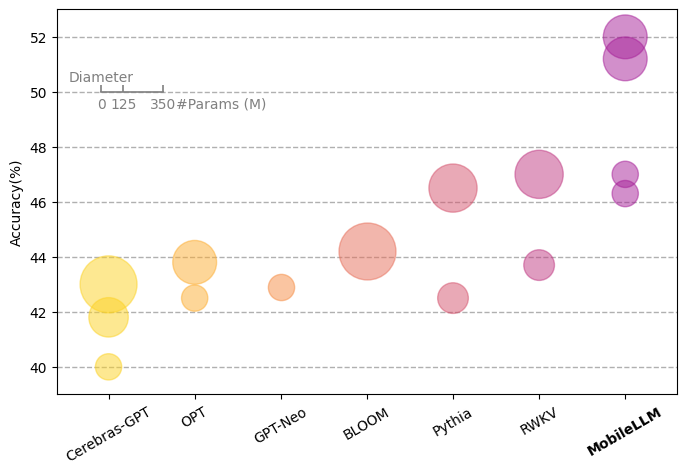

In [5]:

# Parameters Bubble figure
# 参考论文：
#   - 《MobileLLM: Optimizing Sub-billion Parameter Language Models  for On-Device Use Cases》
#   - 《A ConvNet for the 2020s》
plot.style.use('default')                                # 修改 plot 风格
fig: plot.Figure = plot.figure(figsize=(8, 5), dpi=100)  # 创建图形，包括所有维度、图像、文本和标签对象的容器
ax: plot.Axes = plot.axes()                              # 创建维度，包括图像、有边界的格子、刻度和标签、图表元素


# == 数据点 ==
parameter_scales = {
        'Cerebras-GPT': np.array([[40, 150], [41.8, 225], [43, 325]]),
        'OPT': np.array([[42.5, 150], [43.8, 250]]),
        'GPT-Neo': np.array([[42.9, 150]]),
        'BLOOM': np.array([[44.2, 325]]),
        'Pythia': np.array([[42.5, 175], [46.5, 275]]),
        'RWKV': np.array([[43.7, 175], [47, 275]]),
        'MobileLLM': np.array([[46.3, 150], [47, 150], [51.2, 250], [52, 250]])
}
num_params = len(parameter_scales)


# == 自定义颜色映射 ==
# 参考：https://blog.csdn.net/mr_cat123/article/details/78638491
color_shrink = 3
cmap = plot.cm.get_cmap("plasma", num_params + (color_shrink * 2 - 1))    # 自定义颜色映射


# == 绘制气泡图 ==
for (i, (key, scale)) in enumerate(parameter_scales.items()):
    x, y, s = np.ones_like(scale[:, 0]) * i, scale[:, 0], scale[:, 1]
    plot.scatter(x=x, y=y, s=(s ** 2) / (2 * math.pi * 10),
                 color=cmap(num_params - i + color_shrink),
                 alpha=0.5, zorder=10,
                 label=key)


# == 设置图表信息，限制图表显示范围 ==
plot.ylabel("Accuracy(%)")
plot.xlim(0-0.6, 6+0.6)     # 限制 x 轴范围
plot.ylim(40-1, 52+1)       # 限制 y 轴范围
plot.xticks(ticks=np.arange(num_params), 
            labels=list(parameter_scales.keys()), 
            rotation=30)


# == 设置标签字体粗体 ==
labels = ax.get_xticklabels()
labels[-1].set_fontweight(FontWeight.BOLD.value)


# == 设置网格 ==
plot.grid(axis="x", linestyle=LineStyle.EMPTY.value)
plot.grid(axis="y", linestyle=LineStyle.DASHED.value, linewidth=1)


# == 绘制内嵌刻度比例尺，要在绘制完主要的图表后再绘制 ==
axes_in: plot.Axes = inset_axes(ax, width="10%", height="10%", loc=Location.UPPER_LEFT.value, borderpad=3.2)  # 这个 10% 不能动
draw_ticks(axes_in, ticker.FixedLocator([0, 125, 350]), "Diameter", "#Params (M)")


# == 保存和展示图标 ==
savefig(fig=fig, path="./figures/Parameters Bubble figure", dpi=dpi_save) # 保存图表
plot.show()

In [6]:
def hide_axes(ax: plot.Axes):
    """
    隐藏 axes 的所有内容
    """
    ax.spines[[
        Align.LEFT.value, 
        Align.RIGHT.value, 
        Align.TOP.value, 
        Align.BOTTOM.value]].set_visible(False)      # 隐藏所有边框
    ax.set_facecolor((0, 0, 0, 0))                 # 设置背景为透明
    ax.xaxis.set_major_locator(plot.NullLocator()) # 隐藏 x 轴主刻度线
    ax.yaxis.set_major_locator(plot.NullLocator()) # 隐藏 y 轴主刻度线
    # 如果不再显示 axis，则可以直接 ax.axis("off")

Saving figure to ./figures/Design Roadmap figure.svg


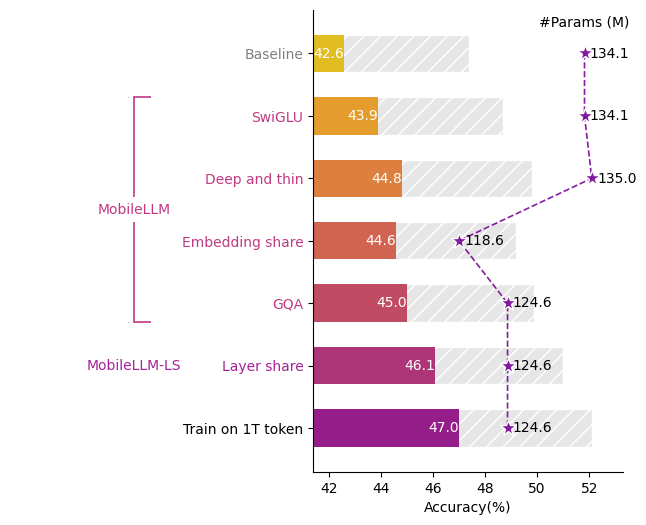

In [7]:

# Design Roadmap figure (Saining Plot/Overall Trajectory Plot)
# 参考论文：《MobileLLM: Optimizing Sub-billion Parameter Language Models  for On-Device Use Cases》
plot.style.use('default')                                # 修改 plot 风格
fig: plot.Figure = plot.figure(figsize=(8, 6), dpi=100)  # 创建图形，包括所有维度、图像、文本和标签对象的容器
ax_out: plot.Axes = plot.axes()                          # 创建外层维度，包括图像、有边界的格子、刻度和标签、图表元素
hide_axes(ax_out)                                        # 隐藏外层 axes
ax: plot.Axes = inset_axes(ax_out,  # 创建内层 axes
                             width="50%", height="100%",
                             loc=Location.RIGHT.value)


# == 数据点 ==
roadmap = {
        'Baseline':
            {
                'foreground': 42.6,
                'background': 47.4,
                'params(M)': 134.1,
            },
        'SwiGLU':
            {
                'foreground': 43.9,
                'background': 48.7,
                'params(M)': 134.1,
                'group': "MobileLLM",
            },
        'Deep and thin': 
            {
                'foreground': 44.8,
                'background': 49.8,
                'params(M)': 135.0,
                'group': "MobileLLM",
            },
        'Embedding share':
            {
                'foreground': 44.6,
                'background': 49.2,
                'params(M)': 118.6,
                'group': "MobileLLM",
            },
        'GQA': 
            {
                'foreground': 45.0,
                'background': 49.9,
                'params(M)': 124.6,
                'group': "MobileLLM",
            },
        'Layer share': 
            {
                'foreground': 46.1,
                'background': 51.0,
                'params(M)': 124.6,
                'group': "MobileLLM-LS",
            },
        'Train on 1T token': 
            {
                'foreground': 47.0,
                'background': 52.1,
                'params(M)': 124.6,
            },
}
num_datas = len(roadmap)
minmax = {
    'min_foreground': min([value['foreground'] for value in list(roadmap.values())]),
    'max_foreground': max([value['foreground'] for value in list(roadmap.values())]),
    'min_background': min([value['background'] for value in list(roadmap.values())]),
    'max_background': max([value['background'] for value in list(roadmap.values())]),
    'min_params(M)': min([value['params(M)'] for value in list(roadmap.values())]),
    'max_params(M)': max([value['params(M)'] for value in list(roadmap.values())]),
}


# == 标记和线条参数 ==
marker_kwargs = {
    'linestyle': LineStyle.DASHED.value,  # 线条类型
    'marker': Marker.STAR.value,         # 标记图形
    'markersize': 12, 
    'markeredgewidth': 1,
    'markeredgecolor': "white",
}   # 还有 'markeredgecolor', 'markerfacecolor' 等参数
line_kwargs = {'linewidth': 1.2}


# == 自定义颜色映射 ==
# 参考：https://blog.csdn.net/mr_cat123/article/details/78638491
color_shrink = 3
cmap = plot.cm.get_cmap("plasma", num_datas + (color_shrink * 2 - 1))    # 自定义颜色映射


# == 绘制水平柱状图 ==
height_ratio = 0.6
for (i, (key, value)) in enumerate(roadmap.items()):
    y = num_datas - i - 1
    width_foreground = value['foreground']
    width_background = value['background']
    color_foreground = np.multiply(np.array(cmap(num_datas - i + color_shrink)), 0.9)
    plot.barh(y=y, width=width_background, height=height_ratio,      # 绘制背景
              color=(0.9, 0.9, 0.9),
              alpha=1, zorder=-10,
              hatch='//', edgecolor="white")
    plot.barh(y=y, width=width_foreground, height=height_ratio,      # 绘制前景
              color=color_foreground,
              alpha=1, zorder=0)
    plot.text(x=width_foreground, y=y, s=f"{width_foreground:.1f}",  # 显示参数值
              ha=Align.RIGHT.value, va=Align.CENTER.value, color="white")


# == 绘制散点图 ==
# 散点图的显示区间在 max_foreground 和 max_background 之间
params = [param['params(M)'] for param in list(roadmap.values())]
params_x = [
    (param - minmax['min_params(M)']) / (minmax['max_params(M)'] - minmax['min_params(M)']) * (minmax['max_background'] - minmax['max_foreground']) + minmax['max_foreground']
    for param in params]
params_y = list(reversed(np.arange(num_datas)))
plot.text(x=params_x[0], y=params_y[0] + 0.5, s="#Params (M)",
          ha=Align.CENTER.value, va=Align.CENTER.value,  color="black")
plot.plot(params_x, params_y,
          color=np.multiply(np.array(cmap(color_shrink)), 0.9),
          **marker_kwargs, **line_kwargs)
for (i, (x, y)) in enumerate(zip(params_x, params_y)):               # 显示参数值
    plot.text(x=x + 0.2, y=y, s=f"{params[i]:.1f}", 
              ha=Align.LEFT.value, va=Align.CENTER.value, color="black")


# == 设置图表信息，限制图表显示范围 ==
plot.xlabel("Accuracy(%)")
plot.xlim(min(minmax['min_foreground'], minmax['min_background']) - 1.2, 
          max(minmax['max_foreground'], minmax['max_background']) + 1.2)
plot.ylim(-(1 - height_ratio / 2), num_datas - height_ratio / 2), 
plot.yticks(ticks=np.arange(num_datas), 
            labels=reversed(list(roadmap.keys())))


# == 设置边框 ==
ax.spines[Align.RIGHT.value].set_visible(False)
ax.spines[Align.TOP.value].set_visible(False)


# == 设置标签字体颜色 ==
labels = ax.get_yticklabels()
label_groups = {}
for (i, (label, (key, value))) in enumerate(zip(labels, reversed(list(roadmap.items())))):
    if key.lower() in ["baseline"]:       # 基准数据，标记为灰色
        label.set_color("gray")
        continue
        
    if 'group' in value:       # 成组数据，集合同一个组的数据，颜色标记为组内第一个数据的颜色
        y = i
        group = value['group']
        if group not in label_groups:
            label_groups[group] = []
        label_groups[group].append({'y': y, 'label': label, 'key': key})    # 集合同一个组的数据
        label.set_color(cmap(label_groups[group][0]['y'] + color_shrink))   # 颜色标记为组内第一个数据的颜色
    else:                                 # 单独数据，标记为黑色
        label.set_color("black")


# == 创建标签组 axes_label_group ==
height_total = num_datas + 1 - height_ratio
for key, group in label_groups.items():
    x, y = 0.2, (group[0]['y'] + (1 - height_ratio)) / height_total
    w, h = 0.2, (len(group) - (1 - height_ratio)) / height_total
    color = cmap(group[0]['y'] + color_shrink)
    line_width = 1.2
    box = dict(facecolor="white", edgecolor="white", linewidth=0, alpha=1)   # 文本纯白背景
    
    axes_label_group: plot.Axes = ax_out.inset_axes([x, y, w, h])
    hide_axes(axes_label_group)
    if len(group) > 1:  
        axes_label_group.spines[Align.LEFT.value].set_visible(True)          # 显示左边框
        axes_label_group.spines[Align.LEFT.value].set_color(color)           # 设置左边框颜色
        axes_label_group.spines[Align.LEFT.value].set_linewidth(line_width)  # 设置左边框宽度
        axes_label_group.yaxis.set_major_locator(plot.FixedLocator([0, 1]))  # 设置 y 轴主刻度线
        axes_label_group.set_ylim(0, 1)                                      # 设置 y 轴范围，和 y 轴刻度线数量一致就可以了
        axes_label_group.tick_params(axis="y", which="major",                # y 轴刻度线参数设置
                                     labelsize=0, width=line_width, length=12,
                                     direction="in", color=color)
        axes_label_group.text(0, 0.5, key,
                              ha=Align.CENTER.value, va=Align.CENTER.value, 
                              color=color, bbox=box)
    else:
        axes_label_group.text(0, 0.5, key,
                              ha=Align.CENTER.value, va=Align.CENTER.value, 
                              color=color, bbox=box)


# == 保存和展示图标 ==
savefig(fig=fig, path="./figures/Design Roadmap figure", dpi=dpi_save) # 保存图表
plot.show()

Saving figure to ./figures/Design Roadmap figure.png.svg


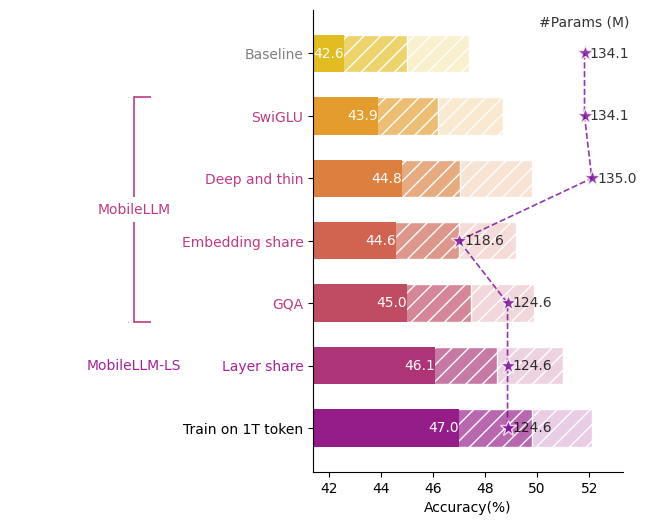

In [8]:

# Design Roadmap figure (Saining Plot/Overall Trajectory Plot)
# 参考论文：《MobileLLM: Optimizing Sub-billion Parameter Language Models  for On-Device Use Cases》
plot.style.use('default')                                # 修改 plot 风格
fig: plot.Figure = plot.figure(figsize=(8, 6), dpi=100)  # 创建图形，包括所有维度、图像、文本和标签对象的容器
ax_out: plot.Axes = plot.axes()                          # 创建外层维度，包括图像、有边界的格子、刻度和标签、图表元素
hide_axes(ax_out)                                        # 隐藏外层 axes
ax: plot.Axes = inset_axes(ax_out,  # 创建内层 axes
                             width="50%", height="100%",
                             loc=Location.RIGHT.value)


# == 数据点 ==
roadmap = {
        'Baseline':
            {
                'accuracy': [42.6, 47.4],
                'params(M)': [134.1, 376.8],
            },
        'SwiGLU':
            {
                'accuracy': [43.9, 48.7],
                'params(M)': [134.1, 386.7],
                'group': "MobileLLM",
            },
        'Deep and thin': 
            {
                'accuracy': [44.8, 49.8],
                'params(M)': [135.0, 380.3],
                'group': "MobileLLM",
            },
        'Embedding share':
            {
                'accuracy': [44.6, 49.2],
                'params(M)': [118.6, 351.6],
                'group': "MobileLLM",
            },
        'GQA': 
            {
                'accuracy': [45.0, 49.9],
                'params(M)': [124.6, 345.3],
                'group': "MobileLLM",
            },
        'Layer share': 
            {
                'accuracy': [46.1, 51.0],
                'params(M)': [124.6, 345.3],
                'group': "MobileLLM-LS",
            },
        'Train on 1T token': 
            {
                'accuracy': [47.0, 52.1],
                'params(M)': [124.6, 345.3],
            },
}
# --
for key, value in roadmap.items():
    value['accuracy'] = [
        value['accuracy'][0],
        (np.random.randn(1) * 0.2).item() + (value['accuracy'][0] + value['accuracy'][1]) / 2, 
        value['accuracy'][1]
    ]
    value['params(M)'] = [value['params(M)'][0]]
# 参数计算
num_accuracy = len(list(roadmap.values())[0]['accuracy'])
num_params = len(list(roadmap.values())[0]['params(M)'])
num_datas = len(roadmap)
accuracy = [param['accuracy'] for param in list(roadmap.values())]
params = [param['params(M)'] for param in list(roadmap.values())]
minmax = {
    'min_accuracy': [min(np.array(accuracy).T[i]) for i in range(num_accuracy)],
    'max_accuracy': [max(np.array(accuracy).T[i]) for i in range(num_accuracy)],
    'min_params(M)': [min(np.array(params).T[i]) for i in range(num_params)],
    'max_params(M)': [max(np.array(params).T[i]) for i in range(num_params)],
}


# == 标记和线条参数 ==
marker_kwargs = {
    'linestyle': LineStyle.DASHED.value,  # 线条类型
    'marker': Marker.STAR.value,         # 标记图形
    'markersize': 12, 
    'markeredgewidth': 1,
    'markeredgecolor': "white",
}   # 还有 'markeredgecolor', 'markerfacecolor' 等参数
line_kwargs = {'linewidth': 1.2}


# == 自定义颜色映射 ==
# 参考：https://blog.csdn.net/mr_cat123/article/details/78638491
color_shrink = 3
cmap = plot.cm.get_cmap("plasma", num_datas + (color_shrink * 2 - 1))    # 自定义颜色映射


# == 绘制水平柱状图 ==
height_ratio = 0.6
for (i, (key, value)) in enumerate(roadmap.items()):
    y = num_datas - i - 1
    accuracy = value['accuracy']
    color = np.multiply(np.array(cmap(num_datas - i + color_shrink)), 0.9)
    bar_kwargs = {}
    for i_column in range(num_accuracy):
        width = accuracy[i_column]
        # 绘制柱状图
        if i_column != 0:
            bar_kwargs = dict(hatch='//', edgecolor="white")
            color = (1 - i_column / num_accuracy) * color + i_column / num_accuracy
        plot.barh(y=y, width=width, height=height_ratio,
                  color=color, alpha=1, zorder=-10 * i_column,
                  **bar_kwargs)
        # 绘制数据文本
        if i_column == 0:
            plot.text(x=width, y=y, s=f"{width:.1f}",  # 显示参数值
                      ha=Align.RIGHT.value, va=Align.CENTER.value, 
                      color="white", zorder=-10 * i_column)


# == 绘制折线图 ==
# 折线图的显示区间在 max_foreground 和 max_background 之间
params_x = np.array([
    (param - min(minmax['min_params(M)'])) / (max(minmax['max_params(M)']) - min(minmax['min_params(M)'])) * (max(minmax['max_accuracy']) - min(minmax['max_accuracy'])) + min(minmax['max_accuracy'])
    for param in params
]).T
params_y = list(reversed(np.arange(num_datas)))
params_value = np.array(params).T
for i_column in range(num_params):
    color = np.multiply(np.array(cmap(color_shrink)), 0.9)
    plot.plot(params_x[i_column], params_y,  # 绘制折线图
              color=color, alpha=0.8 * (1 - i_column / num_params), zorder=-10 * i_column,
              **marker_kwargs, **line_kwargs)
    if i_column == 0:
        plot.text(x=params_x[i_column][0], y=params_y[0] + 0.5, s="#Params (M)",  # 显示折线图标签
                  ha=Align.CENTER.value, va=Align.CENTER.value,
                  color="black", alpha=0.8 * (1 - i_column / num_params), zorder=-10 * i_column)
        for (i, (x, y)) in enumerate(zip(params_x[i_column], params_y)):            # 显示参数值
            plot.text(x=x + 0.2, y=y, s=f"{params_value[i_column][i]:.1f}",
                      ha=Align.LEFT.value, va=Align.CENTER.value,
                      color="black", alpha=0.8 * (1 - i_column / num_params), zorder=-10 * i_column)


# == 设置图表信息，限制图表显示范围 ==
plot.xlabel("Accuracy(%)")
plot.xlim(min(minmax['min_accuracy']) - 1.2, 
          max(minmax['max_accuracy']) + 1.2)
plot.ylim(-(1 - height_ratio / 2), num_datas - height_ratio / 2), 
plot.yticks(ticks=np.arange(num_datas), 
            labels=reversed(list(roadmap.keys())))


# == 设置边框 ==
ax.spines[Align.RIGHT.value].set_visible(False)
ax.spines[Align.TOP.value].set_visible(False)


# == 设置标签字体颜色 ==
labels = ax.get_yticklabels()
label_groups = {}
for (i, (label, (key, value))) in enumerate(zip(labels, reversed(list(roadmap.items())))):
    if key.lower() in ["baseline"]:       # 基准数据，标记为灰色
        label.set_color("gray")
        continue
        
    if 'group' in value:       # 成组数据，集合同一个组的数据，颜色标记为组内第一个数据的颜色
        y = i
        group = value['group']
        if group not in label_groups:
            label_groups[group] = []
        label_groups[group].append({'y': y, 'label': label, 'key': key})    # 集合同一个组的数据
        label.set_color(cmap(label_groups[group][0]['y'] + color_shrink))   # 颜色标记为组内第一个数据的颜色
    else:                                 # 单独数据，标记为黑色
        label.set_color("black")


# == 创建标签组 axes_label_group ==
height_total = num_datas + 1 - height_ratio
for key, group in label_groups.items():
    x, y = 0.2, (group[0]['y'] + (1 - height_ratio)) / height_total
    w, h = 0.2, (len(group) - (1 - height_ratio)) / height_total
    color = cmap(group[0]['y'] + color_shrink)
    line_width = 1.2
    box = dict(facecolor="white", edgecolor="white", linewidth=0, alpha=1)   # 文本纯白背景
    
    axes_label_group: plot.Axes = ax_out.inset_axes([x, y, w, h])
    hide_axes(axes_label_group)
    if len(group) > 1:  
        axes_label_group.spines[Align.LEFT.value].set_visible(True)          # 显示左边框
        axes_label_group.spines[Align.LEFT.value].set_color(color)           # 设置左边框颜色
        axes_label_group.spines[Align.LEFT.value].set_linewidth(line_width)  # 设置左边框宽度
        axes_label_group.yaxis.set_major_locator(plot.FixedLocator([0, 1]))  # 设置 y 轴主刻度线
        axes_label_group.set_ylim(0, 1)                                      # 设置 y 轴范围，和 y 轴刻度线数量一致就可以了
        axes_label_group.tick_params(axis="y", which="major",                # y 轴刻度线参数设置
                                     labelsize=0, width=line_width, length=12,
                                     direction="in", color=color)
        axes_label_group.text(0, 0.5, key,
                              ha=Align.CENTER.value, va=Align.CENTER.value, 
                              color=color, bbox=box)
    else:
        axes_label_group.text(0, 0.5, key,
                              ha=Align.CENTER.value, va=Align.CENTER.value, 
                              color=color, bbox=box)


# == 保存和展示图标 ==
savefig(fig=fig, path="./figures/Design Roadmap figure", dpi=dpi_save) # 保存图表
plot.show()

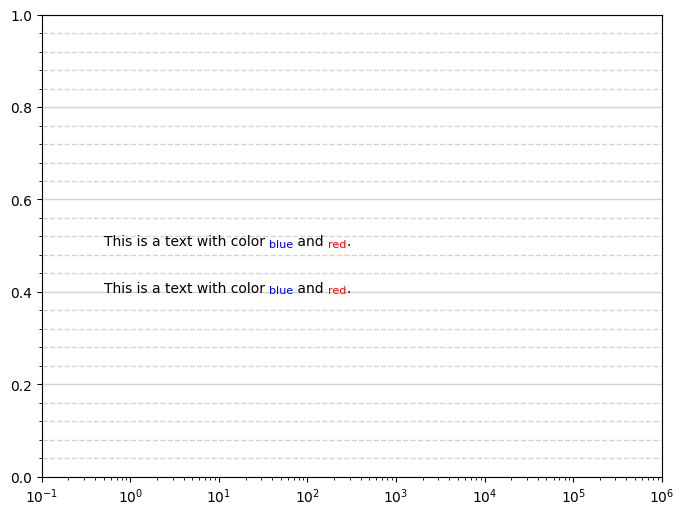

In [9]:

from text import colored_text, custom_colored_text, format_text

plot.style.use('default')                                # 修改 plot 风格
fig: plot.Figure = plot.figure(figsize=(8, 6), dpi=100)  # 创建图形，包括所有维度、图像、文本和标签对象的容器
ax: plot.Axes = plot.axes()                              # 创建维度，包括图像、有边界的格子、刻度和标签、图表元素

# == 绘制彩色文本 ==
# colored_text(x=0.5, y=0.5, s="This is a text with color <blue>blue</blue> and <red>red</red>.")
custom_colored_text(ax, x=0.5, y=0.5, s="This is a text with color <blue>blue</blue> and <red>red</red>.",
                    color_kwarg_definitions=
                    {
                        "blue": dict(fontsize=8),
                        "red": dict(fontsize=8),
                        "black": dict(fontsize=10)
                    })
format_text(ax, x=0.5, y=0.4, s="This is a text with color <blue> and <red>.",
            default_textprops=dict(fontsize=10),
            highlight_textprops=[
                dict(color="blue", fontsize=8),
                dict(color="red", fontsize=8)
            ])

# == 表格刻度绘制 ==
ax.set_xlim(10**-1, 10**6)
ax.set_xscale("log")
ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
# 绘制刻度线网格
plot.grid(axis="y", which="major", linestyle=LineStyle.SOLID.value, linewidth=1, color="lightgray")
plot.grid(axis="y", which="minor", linestyle=LineStyle.DASHED.value, linewidth=1, color="lightgray")

# 其他
# 绘制分块图，标题在图内，颜色条：https://realpython.com/python-matplotlib-guide/

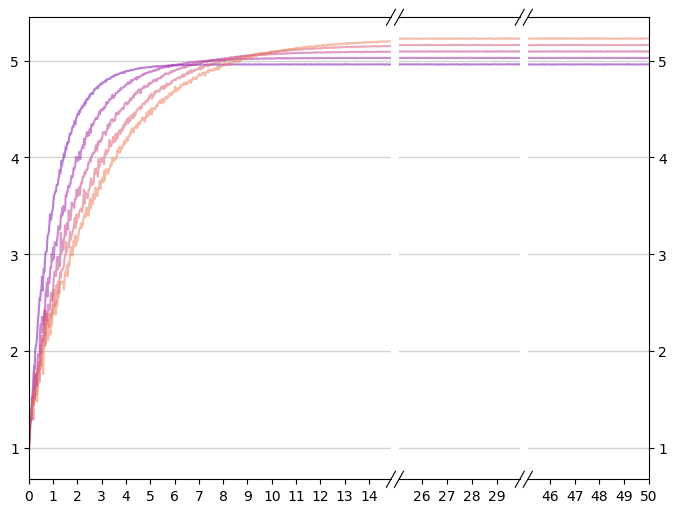

In [10]:

# -- figure
# == 超参数 == 
l = 0.02            # 截断线长度
d = 0.04            # 截断区域宽度
angle = 30          # 截断线旋转角度 degrees
tick_shrink = 0.1   # 刻度向内收缩量（为了隐藏重叠刻度线）

intervals = [(0, 15), (25, 30), (45, 50)]  # 显示区间

# == 自定义颜色映射 ==
# 参考：https://blog.csdn.net/mr_cat123/article/details/78638491
plot.style.use('default')                                # 修改 plot 风格
color_shrink = 2
cmap = plot.cm.get_cmap("plasma", num_datas + (color_shrink * 2 - 1))    # 自定义颜色映射


# == 数据点 ==
n = 2000
x = np.linspace(0, 50, n)
num_datas = 5
y = [(5 - (np.exp(-x / (i_datas / 2 + 1)) + 0.01) * (4 + np.random.randn(n) * 0.1)) + i_datas / 15
     for i_datas in np.arange(num_datas)]

# == 绘制图表 ==
d_intervals = [interval[1] - interval[0] for interval in intervals]
fig, axes = plot.subplots(      # 创建图表和轴
    nrows=1, ncols=len(intervals),
    width_ratios=d_intervals,
    figsize=(8, 6), dpi=100
)
plot.subplots_adjust(wspace=d)    # 调整所有子图 width space 间隔为 0
# 在每个子图上进行绘制
num_intervals = len(intervals)
for i in np.arange(num_intervals):
    interval = intervals[i]
    ax: plot.Axes = axes[i]
    
    # == 绘制图线 ==
    for j in np.arange(num_datas):
        ax.plot(x, y[j], color=cmap(j + color_shrink), alpha=0.5)

    # 设置轴刻度范围
    if i == 0:
        ax.set_xlim(interval[0], interval[1] - tick_shrink)
    elif i == num_intervals - 1:
        ax.set_xlim(interval[0] + tick_shrink, interval[1])
    else:
        ax.set_xlim(interval[0] + tick_shrink, interval[1] - tick_shrink)
    
    # 隐藏左、右边框
    ax.xaxis.set_major_locator(plot.IndexLocator(base=1, offset=0)) # 隐藏 x 轴主刻度线
    if i == 0:                      # 第一个子图，隐藏右边框，显示左边 y 轴刻度
        ax.spines[Align.RIGHT.value].set_visible(False)
        ax.yaxis.tick_left()
        ax.tick_params(labelleft=True)
    elif i == num_intervals - 1:    # 最后一个子图，隐藏左边框，显示右边 y 轴刻度和标签
        ax.spines[Align.LEFT.value].set_visible(False)
        ax.yaxis.tick_right()
        ax.tick_params(labelright=True)
    else:                           # 其他子图，隐藏左、右边框，不显示右边 y 轴刻度
        ax.spines[[Align.LEFT.value, Align.RIGHT.value]].set_visible(False)
        ax.yaxis.set_tick_params(length=0)
        ax.tick_params(labelleft=False, labelright=False)
    
    # 绘制截断区域和标记
    d_interval = d_intervals[i]
    d_x = l * np.sin(np.deg2rad(angle)) * sum(d_intervals) / d_interval * fig.get_figheight() / fig.get_figwidth()
    d_y = l * np.cos(np.deg2rad(angle))
    if i != 0:
        ax.plot((-d_x, +d_x), (1 - d_y, 1 + d_y), 
                  transform=ax.transAxes, color="black", clip_on=False, linewidth=0.8)
        ax.plot((-d_x, +d_x), (-d_y, +d_y), 
                  transform=ax.transAxes, color="black", clip_on=False, linewidth=0.8)
    if i != num_intervals - 1:
        ax.plot((1 - d_x, 1 + d_x), (-d_y, +d_y), 
                  transform=ax.transAxes, color="black", clip_on=False, linewidth=0.8)
        ax.plot((1 - d_x, 1 + d_x), (1 - d_y, 1 + d_y), 
                  transform=ax.transAxes, color="black", clip_on=False, linewidth=0.8)
    
    # 绘制网格
    ax.grid(axis="y", linestyle=LineStyle.SOLID.value, linewidth=1, color="lightgray")

plot.show()

In [11]:

# 绘制 heatmap 参考：https://blog.csdn.net/qq_45866407/article/details/107891518